In [1]:
#installations and stuff
!pip install yt_dlp
!pip install yt-dlp[web]
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 53.6 MB/s eta 0:00:00:00:01


In [2]:
import yt_dlp

#function to locally download the video
def download_vid(name, url):
    ydl_opts = {
        'outtmpl': f'downloaded_video{name[:3]}.%(ext)s',
        'format': 'bestvideo[ext=mp4]+bestaudio/best[ext=mp4]/best',
        'merge_output_format': 'mp4',
        'cookies': '/kaggle/input/cookies3/www.youtube.com_cookies (1).txt',
        'ignoreerrors': True,
        'retries': 10,
        'fragment_retries': 10,
        # Avoid AV1 formats
        'format_sort': ['+codec:h264,+codec:vp9'],
        'prefer_free_formats': False,
        'extractor_args': {
            'youtube': {
                'skip': ['dash', 'hls']
            }
        },
        'http_headers': {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
        }
    }
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])

download_vid("dest", "https://www.youtube.com/watch?v=XIdQ6gO3Anc")

[youtube] Extracting URL: https://www.youtube.com/watch?v=XIdQ6gO3Anc
[youtube] XIdQ6gO3Anc: Downloading webpage


[youtube] XIdQ6gO3Anc: Downloading tv client config
[youtube] XIdQ6gO3Anc: Downloading player 69b31e11-tv
[youtube] XIdQ6gO3Anc: Downloading tv player API JSON
[youtube] XIdQ6gO3Anc: Downloading ios player API JSON
[youtube] XIdQ6gO3Anc: Downloading web player API JSON


[youtube] XIdQ6gO3Anc: Downloading initial data API JSON
[info] XIdQ6gO3Anc: Downloading 1 format(s): 299+140
[download] Destination: downloaded_videodes.f299.mp4
[download] 100% of   34.25MiB in 00:00:01 at 18.31MiB/s    
[download] Destination: downloaded_videodes.f140.m4a
[download] 100% of   10.29MiB in 00:00:00 at 30.80MiB/s    
[Merger] Merging formats into "downloaded_videodes.mp4"
Deleting original file downloaded_videodes.f140.m4a (pass -k to keep)
Deleting original file downloaded_videodes.f299.mp4 (pass -k to keep)


In [4]:
#extract frames randomly accordking to the interval we set here the interval is every 50 sec
import cv2

import numpy as np

video_path = "/kaggle/working/downloaded_videodes.mp4"  
capture = cv2.VideoCapture(video_path)
timestamps=[]

if not capture.isOpened():
    print("Error opening video file.")
    exit()

fps = capture.get(cv2.CAP_PROP_FPS)
frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count / fps
interval = 50  # seconds
for sec in range(0, int(duration), interval):
    frame_number = int(sec * fps)
    capture.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    success, frame = capture.read()
    cv2.imwrite(f"frame{sec}.png", frame)
    print(f"saved frame{sec}")
    if not success:
        print(f"Failed to read frame at {sec} seconds.")
        continue



capture.release()


saved frame0
saved frame50
saved frame100
saved frame150
saved frame200
saved frame250
saved frame300
saved frame350
saved frame400
saved frame450
saved frame500
saved frame550
saved frame600
saved frame650


In [14]:
import matplotlib.pyplot as plt

def showpic(image_path):
    image = cv2.imread(image_path)

    if image is None:
        raise ValueError("Image failed to load. Please check the file path.")

        #x, y, w, h = 570, 80, 2880, 1840
        #cropped = image[y:y+h, x:x+w]

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Frame image_path')
    plt.show()


In [12]:
import easyocr
import cv2

# Initialize the reader with English language
reader = easyocr.Reader(['en'])


# Perform OCR

def easy_ocr(image):
  data=""
  image = cv2.imread(image)
  try:
    result = reader.readtext(image)
    for _, text, _ in result:
         data+=text
    return data
  except:
   return data



BMOTMAQJarWd AJUD


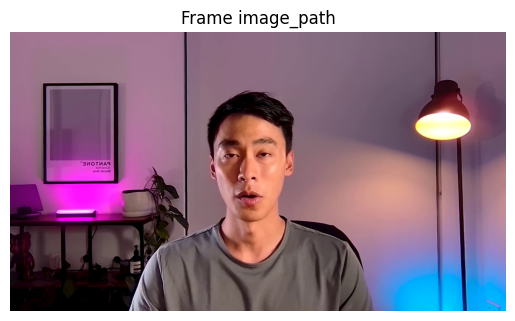

In [15]:
extracted=easy_ocr(f"/kaggle/working/frame0.png")
print(extracted)  #random frame
showpic("/kaggle/working/frame0.png") #not where where he got the BMOTMAQJarWd AJUD from but oki

alicePerson( "Alice")24 )#Correctalice=Person( "Alice" ,"24" )# Mistakepixegami


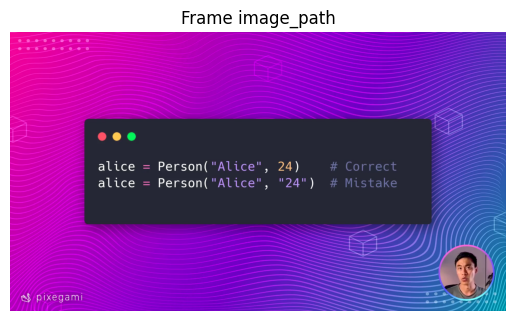

In [16]:
extracted=easy_ocr(f"/kaggle/working/frame100.png")
print(extracted)  #frame with code 
showpic(f"/kaggle/working/frame100.png")